In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = Image.open("image.jpg")

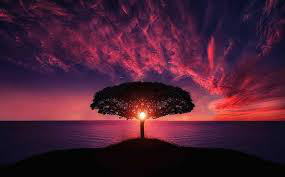

In [3]:
img

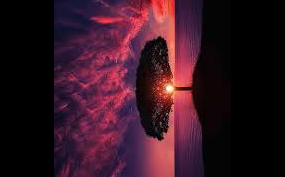

In [4]:
img.rotate(90)

In [5]:
img_array = np.asarray(img)

In [6]:
print(type(img))
print(type(img_array))

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>


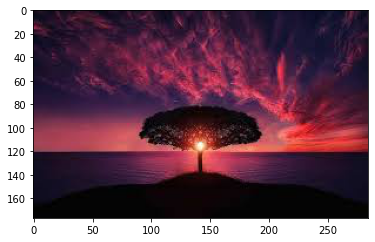

In [7]:
plt.imshow(img_array)

In [8]:
img_array.shape

(177, 285, 3)

In [9]:
img2 = img.copy()
img_array2 = img_array.copy()

In [10]:
import matplotlib.image as mpimg

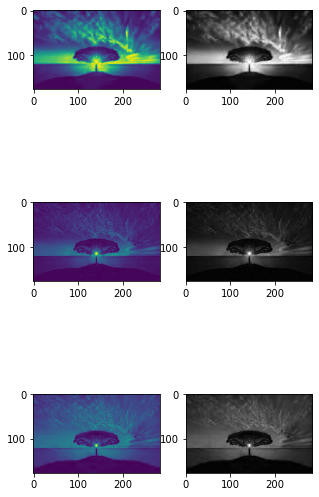

In [11]:
plt.figure(1, figsize = (5, 10))
plt.subplot(321)
plt.imshow(img_array2[:, :, 0])
plt.subplot(322)
plt.imshow(img_array2[:, :, 0], cmap = "gray")
plt.subplot(323)
plt.imshow(img_array2[:, :, 1])
plt.subplot(324)
plt.imshow(img_array2[:, :, 1], cmap = "gray")
plt.subplot(325)
plt.imshow(img_array2[:, :, 2])
plt.subplot(326)
plt.imshow(img_array2[:, :, 2], cmap = "gray")

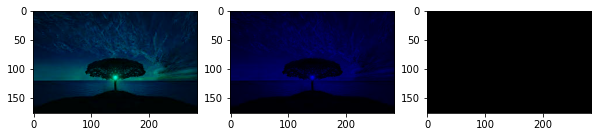

In [12]:
plt.figure(2, figsize = (10, 10))
plt.subplot(131)
img_array2[:, :, 0] = 0
plt.imshow(img_array2)
plt.subplot(132)
img_array2[:, :, 1] = 0
plt.imshow(img_array2)
plt.subplot(133)
img_array2[:, :, 2] = 0
plt.imshow(img_array2)

In [13]:
import cv2

In [14]:
img = cv2.imread("img (1).jpg")
fixed_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.imread("img (1).jpg", cv2.IMREAD_GRAYSCALE)

In [15]:
gray_img.shape

(1788, 1568)

#### OpenCV reads in BGR while Matplotlib reads in RGB

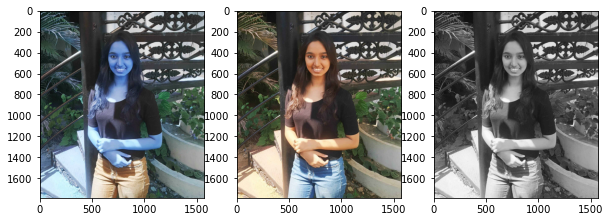

In [16]:
plt.figure(3, figsize = (10, 10))
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(fixed_img)
plt.subplot(133)
plt.imshow(gray_img, cmap = "gray")

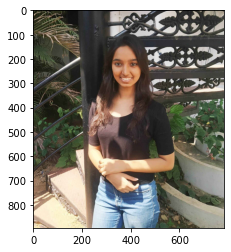

In [17]:
new_img = cv2.resize(fixed_img,
                     (0,0),
                    fixed_img,
                    0.5,
                    0.5)
plt.imshow(new_img)

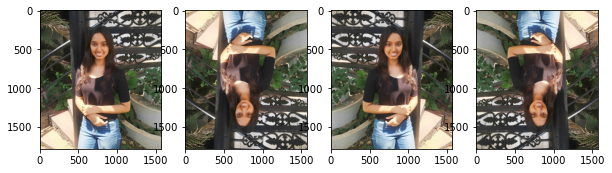

In [18]:
plt.figure(2, figsize = (10, 10))
plt.subplot(141)
plt.imshow(fixed_img)
plt.subplot(142)
plt.imshow(cv2.flip(fixed_img, 0))
plt.subplot(143)
plt.imshow(cv2.flip(fixed_img, 1))
plt.subplot(144)
plt.imshow(cv2.flip(fixed_img, -1))

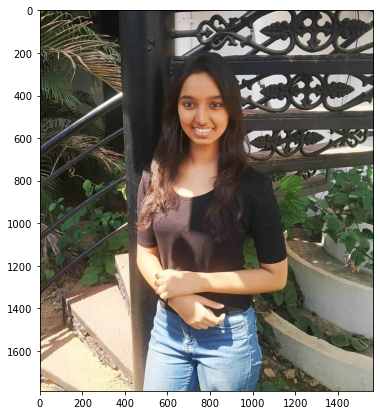

In [19]:
last_img = plt.figure(figsize = (10,7))
ilp = last_img.add_subplot(111)
ilp.imshow(fixed_img)

## Draw shapes on images

In [20]:
black_img = np.zeros(shape = (512, 512, 3),
                    dtype = np.int16)

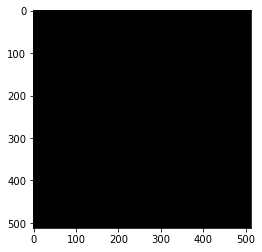

In [21]:
plt.imshow(black_img)

## Drawing Circles, empty and filled

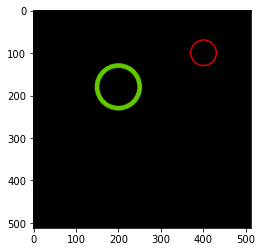

In [22]:
cv2.circle(black_img, center = (400, 100), radius = 30, thickness = 2, color = (255,0,0))
cv2.circle(black_img, center = (200, 180), radius = 50, thickness = 10, color = (100,200,0))
plt.imshow(black_img)

## Empty Rectangle

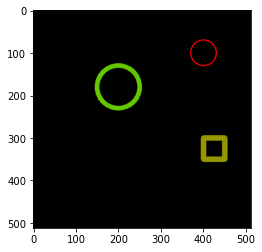

In [23]:
cv2.rectangle(black_img, 
             pt1 = (400, 300),
             pt2 = (450, 350),
             thickness = 12,
             color = (150, 150,0))
plt.imshow(black_img)

## Empty Triangle

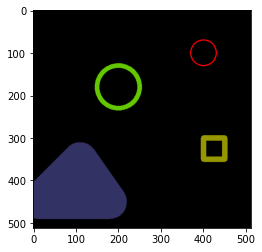

In [24]:
vertices = np.array([[10, 450],
                    [110, 350],
                    [180, 450]],
                   np.int32)
pts = vertices.reshape(-1,1,2)
cv2.polylines(black_img, 
              [pts], 
              isClosed = True, 
              color = (50,50,100), 
              thickness =80)

plt.imshow(black_img)

### filled rectangle

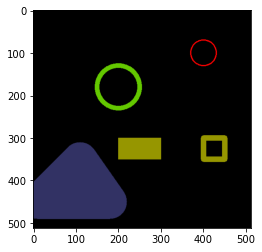

In [25]:
cv2.rectangle(black_img, 
             pt1 = (300, 300),
             pt2 = (200, 350),
             thickness = -1,
             color = (150, 150,0))
plt.imshow(black_img)

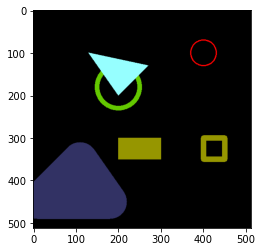

In [26]:
vertices = np.array([[200,200],
                    [270,130],
                    [130,100]],
                   np.int32)
pts = vertices.reshape(-1,1,2)
cv2.fillPoly(black_img, 
              [pts], 
              color = (150,255,255))

plt.imshow(black_img)

## Draw Line

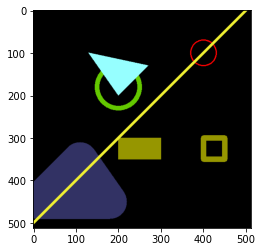

In [27]:
cv2.line(black_img,
        pt1 = (0,500),
        pt2 = (500, 0),
        thickness = 5,
        color = (240, 240, 50))
plt.imshow(black_img)

## Write Text

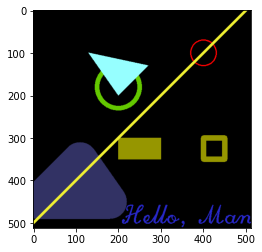

In [28]:
font = cv2.FONT_HERSHEY_SCRIPT_COMPLEX
cv2.putText(black_img, 
            text = "Hello, Mansi here!",
            org = (210, 500),
            fontFace = font,
            fontScale= 2,
            color = (40,40,200),
            thickness = 2,
            lineType = cv2.LINE_8                   
           )
plt.imshow(black_img)

## Draw with Mouse, and Other Event Choices for Mouse

In [29]:
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(img, (x, y), 30, (255,0,0), -1)
    elif event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(img, (x, y), 30, (0,255,0), -1)

cv2.namedWindow(winname = "sketch1")

cv2.setMouseCallback("sketch1", draw_circle)

img = np.zeros((512, 512, 3),
              np.int8)

while True:
    cv2.imshow("sketch1", img)
    
    if cv2.waitKey(5) & 0xFF == ord("q"):
        break
#Exit by clicking "q"

#     if cv2.waitKey(5) & 0xFF == ord("q"):
#         break
# Exit by clicking Esc Key.

cv2.destroyAllWindows()

## Mouse Functionalities - Free size rectangle

In [30]:
drawing = False
ex = -1
ey = -1

def draw_rectangle(event, x, y, flags, params):
    global ex, ey, drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ex, ey = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img, 
                     (ex, ey),
                     (x,y),
                     color = (255, 255, 120),
                     thickness = -1)
        
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img, 
                     (ex, ey),
                     (x,y),
                     color = (255, 255, 120),
                     thickness = -1)
    
cv2.namedWindow(winname = "mydraw")

cv2.setMouseCallback("mydraw", draw_rectangle)

img = np.zeros((512, 512, 3),
              np.int8)

while True:
    cv2.imshow("mydraw", img)
    
    if cv2.waitKey(5) & 0xFF == ord("q"):
        break
        